Author - Sonam Raj

Task 2 - Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.


In [1]:
# Loading Packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2
4,5.0,3.6,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
12,4.8,3.0,1.4,0.1,0
106,4.9,2.5,4.5,1.7,2


In [3]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# To find if any null value is present
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


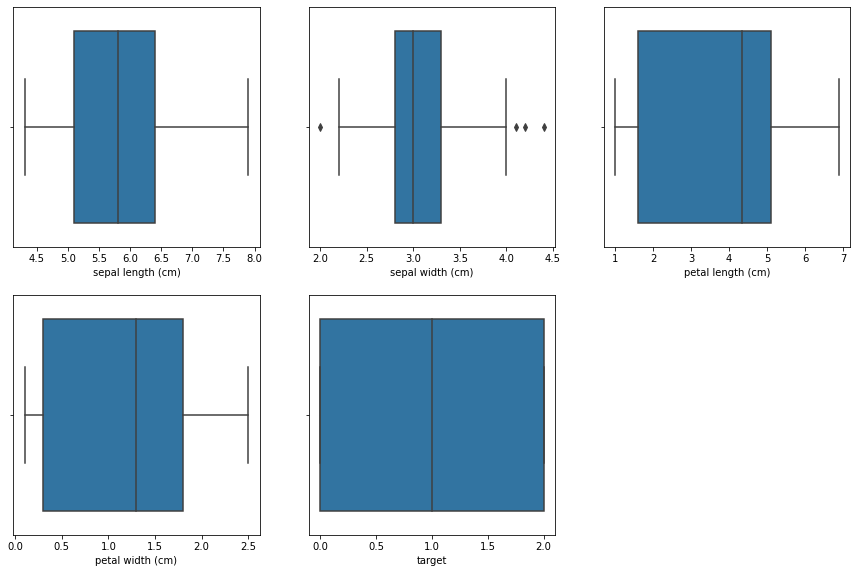

In [8]:
# To find outliers
cols = df.columns
    
# We can start by plotting the data using box plots
plt.figure(figsize = (15,15))
for i in enumerate(cols):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(x = i[1], data =df)

From the above visualization , we can say that few outliers exists for sepal width (cm). Next we will try to remove these outliers

In [9]:
# To remove outliers from 'sepal width (cm)'
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 5)

#### Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
# Standardizing to avoid bias
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)

In [11]:
df_2 = pd.DataFrame(df_norm)
df_2.columns = df.columns[:]
df_2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.910515,1.159151,-1.373764,-1.348525,-1.252455
1,-1.151122,-0.101922,-1.373764,-1.348525,-1.252455
2,-1.391729,0.402507,-1.430841,-1.348525,-1.252455
3,-1.512032,0.150292,-1.316687,-1.348525,-1.252455
4,-1.030819,1.411365,-1.373764,-1.348525,-1.252455


The Hopkins statistic is used to assess the clustering tendency of a data set by measuring the probability that a given data set is generated by a uniform data distribution. In other words, it tests the spatial randomness of the data.

In [12]:
## Check the HOPKINS
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
# How differet your data is from randomly scattered data
hopkins(df_2)

0.8643758283295013

#### Finding the optimal number of clusters

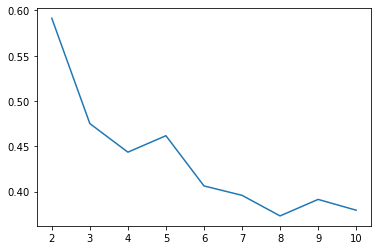

In [14]:
# Let's find the value of K
# Silhouette Score(2-10)

from sklearn.metrics import silhouette_score

sil = []

for k in range(2,11):
    kmean = KMeans(n_clusters = k, random_state = 0).fit(df_2)
    sil.append([k, silhouette_score(df_2, kmean.labels_)])

sil = pd.DataFrame(sil)

plt.plot(sil[0], sil[1])

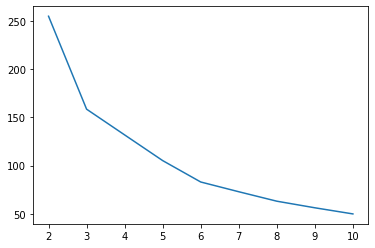

In [15]:
# Elbow/Sum of Squared Distances

ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df_2) #clustering
    ssd.append([k, kmean.inertia_]) # Sum Of Squared distances of samples to their closest cluster center
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

In [16]:
# K=3

kmeans =KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(df_2)

KMeans(n_clusters=3, random_state=0)

In [17]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [18]:
# We will assign the label to the main data(original data)
# Now we will be perfroming cluster Profiling

df['label'] = kmeans.labels_
df.sample(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
74,6.4,2.9,4.3,1.3,1,2
132,6.4,2.8,5.6,2.2,2,0
24,4.8,3.4,1.9,0.2,0,1
34,4.9,3.1,1.5,0.2,0,1


In [19]:
## Find the label wise count of observations
df['label'].value_counts()

2    55
1    47
0    44
Name: label, dtype: int64

In [20]:

# Applying kmeans to the dataset / Creating the kmeans classifier
x = df_2.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

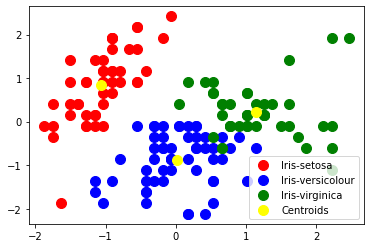

In [21]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()